In [82]:
import datetime
import time

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

# from giskard.plot import adjplot, scattermap
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.plot import networkplot
from graspologic.layouts import layout_umap, layout_tsne
from graspologic.utils import is_fully_connected, largest_connected_component, symmetrize
from matplotlib.patheffects import Normal, Stroke

"""
from pkg.data import (
    load_maggot_graph,
    load_network_palette,
    load_node_palette,
    load_unmatched,
)
"""
# from pkg.io import get_environment_variables
# from pkg.io import glue as default_glue
# from pkg.io import savefig
# from pkg.plot import set_theme
from pkg.platy import (
    load_0_adj_labels,
    load_1_adj_labels,
    load_2_adj_labels,
    load_3_adj_labels,
    load_head_adj_labels,
    load_pygidium_adj_labels,
    load_left_adj_labels,
    load_right_adj_labels,
)
from scipy.cluster import hierarchy
from umap import UMAP

rng = np.random.default_rng(8888)

In [177]:
# load the adjs
left_adj, _ = load_left_adj_labels()
right_adj, _ = load_right_adj_labels()
head_adj, _ = load_head_adj_labels()
pyg_adj, _ = load_pygidium_adj_labels()
adj_0, _ = load_0_adj_labels()
adj_1, _ = load_1_adj_labels()
adj_2, _ = load_2_adj_labels()
adj_3, _ = load_3_adj_labels()

orig_adjs = [left_adj, right_adj, head_adj, pyg_adj, adj_0, adj_1, adj_2, adj_3]

In [205]:
#nx adjs
nx_adjs = []
for adj in orig_adjs:
    nx_adjs.append(nx.from_pandas_adjacency(adj))

#np adjs
np_adjs = []
for adj in orig_adjs:
    np_adjs.append(adj.to_numpy())

#lccs for both
nx_lcc_adjs = []
for adj in nx_adjs:
    nx_lcc_adjs.append((largest_connected_component(adj)))

np_lcc_adjs = []
for adj in np_adjs:
    np_lcc_adjs.append((largest_connected_component(adj)))


In [206]:
#use layout_umap from graspologic
all_x = []
all_y = []
all_degrees = []
all_hues = []

for i, adj in enumerate(nx_adjs):
    X, node_pos = layout_tsne(adj, perplexity=1, n_iter=10000)
    x_pos = []
    y_pos = []
    node_comms = []
    for pos in node_pos:

        #save the assigned community of the node
        node_comms.append(pos[4])
        x_pos.append(pos[1])
        y_pos.append(pos[2])

    node_comms = np.array(node_comms)
    x_pos = np.array(x_pos)
    y_pos = np.array(y_pos)
    degrees = [val for (node, val) in adj.degree()]

    all_x.append(x_pos)
    all_y.append(y_pos)
    all_degrees.append(degrees)
    all_hues.append(node_comms)


/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/U

In [207]:
adj_0, _ = load_0_adj_labels()
nx_0 = nx.from_pandas_adjacency(adj_0)
X_0, node_pos_0 = layout_tsne(nx_0, perplexity=1,  n_iter=10000)

/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


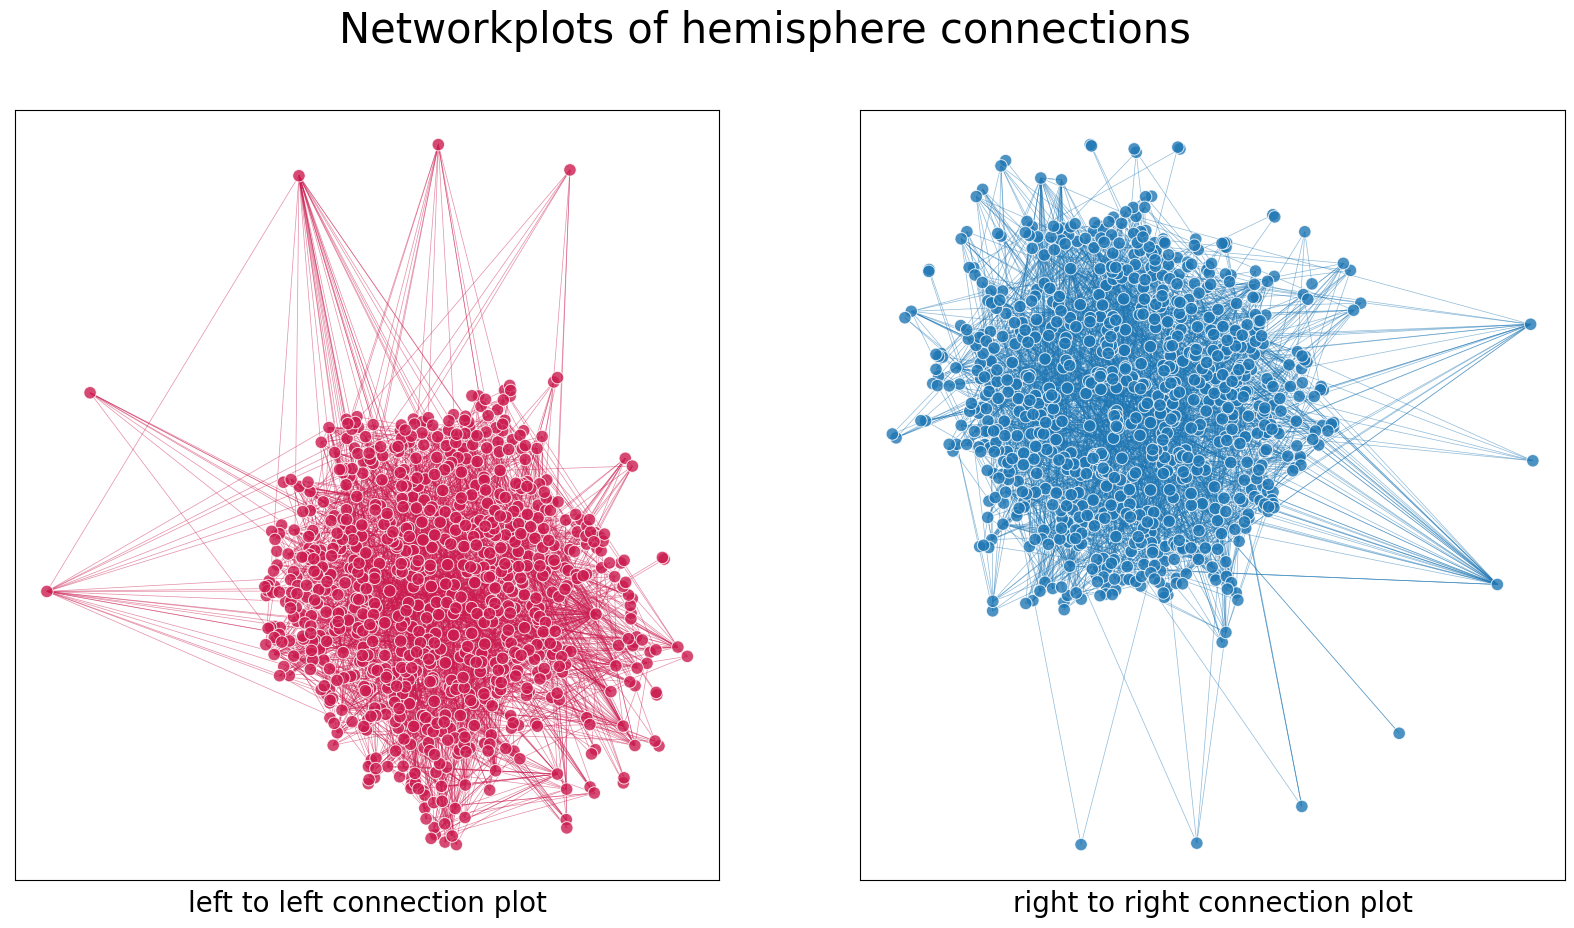

In [208]:
#hemis
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
hemi_adjs = np_lcc_adjs[0:2]
hemi_x = all_x[0:2]
hemi_y = all_y[0:2]
hemi_hues = ["rocket", "tab20"]
hemi_names = ["left", "right"]
for i in range(len(hemi_adjs)):

    node_hues = []
    for j in range(len(hemi_adjs[i])):
        node_hues.append(0)

    node_hues = np.array(node_hues)

    plot = networkplot(
        adjacency=hemi_adjs[i],
        x=hemi_x[i],
        y=hemi_y[i],
        node_hue = node_hues,
        palette=hemi_hues[i],
        node_sizes=(15, 100),
        edge_hue="source",
        edge_alpha=0.5,
        edge_linewidth=0.5,
        ax = axs[i]
    )

    axs[i].set(xlabel="{} to {} connection plot".format(hemi_names[i], hemi_names[i]))
    axs[i].xaxis.label.set_size(20)
    fig.suptitle("Networkplots of hemisphere connections", fontsize=30)

#rocket, cubehelix, tab20, dark:salmon_r, YlOrBr, icefire, seagreen, viridis, magma

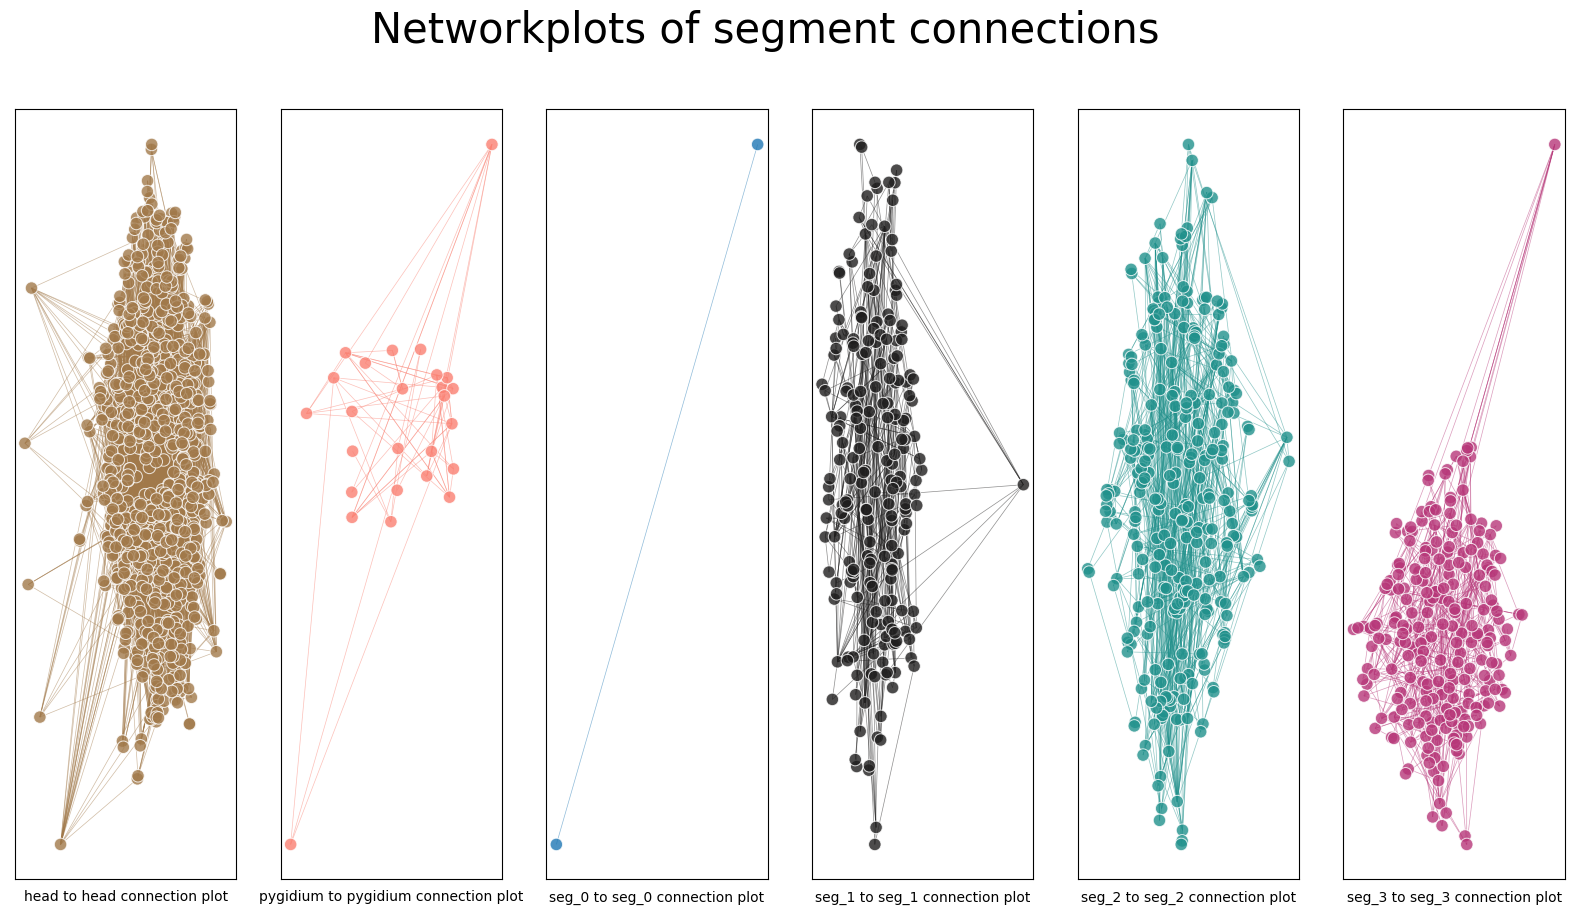

In [209]:
#segs
fig, axs = plt.subplots(1, 6, figsize=(20, 10))
seg_adjs = np_lcc_adjs[2:]
seg_x = all_x[2:]
seg_y = all_y[2:]
seg_hues = ["cubehelix", "dark:salmon_r", "tab20", "icefire", "viridis", "magma"]
seg_names = ["head", "pygidium", "seg_0", "seg_1", "seg_2", "seg_3"]
for i in range(len(seg_adjs)):

    node_hues = []
    for j in range(len(seg_adjs[i])):
        node_hues.append(0)

    node_hues = np.array(node_hues)

    plot = networkplot(
        adjacency=seg_adjs[i],
        x=seg_x[i],
        y=seg_y[i],
        node_hue = node_hues,
        palette=seg_hues[i],
        node_sizes=(15, 100),
        edge_hue="source",
        edge_alpha=0.5,
        edge_linewidth=0.5,
        ax = axs[i]
    )

    axs[i].set(xlabel="{} to {} connection plot".format(seg_names[i], seg_names[i]))
    axs[i].xaxis.label.set_size(10)
    fig.suptitle("Networkplots of segment connections", fontsize=30)

#rocket, cubehelix, tab20, dark:salmon_r, YlOrBr, icefire, seagreen, viridis, magma

get updated data from catmaid
run lcc version of hemis/segs adjs for all tests done so far
make sure figs are nice (publishable ready)
make sure notebooks are nice too
follow show_data.py notebook to plot adjs
- make both fig 1a and 1b
- embed first
- for segments, generalize to case with 5-6 comparisons: 5-6 blocks in adj (keep 0 or not)
- one fig for hemis, one for segs
    - play around with layouts
- read bgm paper
- integrate nadine's pair data
- take subgraphs with pairs and try running one of graph matching techniques: gives predicted pairing; evaluate matching accuracy
    - which method should we use
- use her pairs as seeds and predict remainder (remainder is nodes that aren't given as pairs)